<a href="https://colab.research.google.com/github/EmmanuelChinkaka/GEOG271/blob/main/More/GeoPython_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geographic Data Science with Google Colab

Access the tutorial as Github Gist, where you can open directly in Google Colab: https://gist.github.com/shakasom/577ce46c23b73998cd6f6d396eec3c9a

## Section 1 - Introduction

In this tutorial, you will get introduced to Geosptial data processing, visualization and analysis in your browser using High level Geographic Python libraries with Google  colaboratory. Just like the way we use Google Docs, Google Colab is new tool that enables you to write code in the browser freely with no set up requirements to use it. The tutorial consists of 4 sections: Introduction to Google Colab, Vector Data with Geopandas, Raster Data with Rasterio, and Geodata Visualization.

---

In the first section, We will see how to use Google colab and set up of the required python libraries. As you are reading this, you are already using jupyter notebook in Google colab. The second section will teach you geospatial data processing with Geopandas library. We will perfom some of the most used GIS tasks without using any Desktop GIS software. These tasks include among others, loading spatial data, manipulate geodata, projection and coordinate reference systesm (CRS), as well performing spatial joins, overlay and buffer analysis. The third sections will primarly teach you some useful processing functions specificaly for raster data. In this seciton, we will learn how to access Sentinel Data directly in Python and peform raster calculations and other geoprocessing operations. The main library we use in this section will be Rasterio, a very handy tool for raster analysis and processing. The fourth section will primaraly focus on Geographic data visualizations and cartography with Python, here we will create both static and interactive maps using Geopandas and Folium python library with Matplotlib.










### 1.1 Google Colab

**CELL** This a text cell where you can write any text you like like this. To exceute a cell, you need to press ctrl+Enter.

Below cell is **CODE**. You can write any python code. let us print out, " Hello world"

In [1]:
print('Hellow world!')

Hellow world!


The menu in the upper part is almost familiar. Have a look at it and see what is in File, Edit, Insert , etc.
On the left you have adjustable pannel of table of contentes and files. Look at it also. 

We will start to install the necessary libraries in the next section. I hope you will feel comfortable with Google colab as it is easy and intuitive to use. But I found these resource helpful to learn more about google colab functionality:

https://colab.research.google.com/notebooks/markdown_guide.ipynb 

https://colab.research.google.com/notebooks/welcome.ipynb




### 1.2 Installations & Data

The geospatial libraries are not pre installed in google colab as standard python library, therefore we need to install some libraries to uses. Luckily this is an easy process. You can use either apt install or pip install. You can also create anaconda environment, but that is a bit complex so pip and apt are enough in our case to get the libraries we need. 
These are the libraries we need to install in this tutorial:

1.   Gdal
2.   Geopandas
3.   Rasterio
4.   Folium 
5.   Sentinel Hub Python



The installation might take 1 to 3 minutes depending on the google colab use and traffic.

In [2]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install rasterio for raster data
!pip install rasterio 
# Install Folium for Geographic data visualization
!pip install folium 
# Install Sentinel Hub python 
!pip install sentinelhub --upgrade
# uncompressing data
!apt-get install xz-utils
# Install pysal for choropleth maps with geopandas
!pip install pysal

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease [1,581 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:13 http://security.ubuntu.c

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xz-utils is already the newest version (5.2.2-1.3ubuntu0.1).
xz-utils set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55 kB 256 kB/s 
     |████████████████████████████████| 60 kB 7.8 MB/s 
     |████████████████████████████████| 116 kB 36.0 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 46 kB 4.3 MB/s 
     |████████████████████████████████| 41 kB 574 kB/s 
     |████████████████████████████████| 243 kB 48.1 MB/s 
     |████████████████████████████████| 5.7 MB 65.0 MB/s 
     |████████████████████████████████| 2.4 MB 42.8 MB/s

As you might have noticed, there are no accompanying data with these notebooks. No worries, we live in the browser world and we can get our data from any place including your google drive, a link, directly from the source or from your local machine. But the easiest way is to get your data from github if it is less 25mb. Geopandas also comes with pre built datasets which we will use to learn the basics and then immediatelly do an exercise on the another data. We will also learn how to get satellite data(Sentinel Satellite images) directly in your notebook without downloading it. So let us start importing our data into this notebook. 

In [3]:
!git clone --recursive https://github.com/shakasom/GeoTutorial

Cloning into 'GeoTutorial'...
remote: Enumerating objects: 18, done.
remote: Total 18 (delta 0), reused 0 (delta 0), pack-reused 18
Unpacking objects: 100% (18/18), done.


And that is it, our data is imported. If you check on the your Files (Left Menu - Files), you will see two Folders: a sample data which sample data from Google Colab and GeoTutorial Folder. You might need to hit refress to see the GeoTutorial Folder. But let us use !ls command line to see our folders.

In [4]:
# Let us see what we have inside GeoTutorial Folder
!ls GeoTutorial/


DATA.tar.xz  GeoPython_Tutorial.ipynb  README.md


The data is compressed and we need to uncompress it before we can use it. Let us do that now.  

In [5]:
!tar -xf GeoTutorial/DATA.tar.xz


In [6]:
# See the data
!ls DATA

cities.geojson	      GBGDEM_50m.tfw	      vastra.cpg  vastra.shp
DeSO_region.gpkg      GBGDEM_50m.tif	      vastra.dbf  vastra.shx
DeSO_region.gpkg-shm  GBGDEM_50m.tif.aux.xml  vastra.prj
DeSO_region.gpkg-wal  roads.geojson	      vastra.qpj


Good we have our data now. Let us import the libraries we will use in this tutorial. It is prety standard to use abbreviations instead of using the whole name of the library. Forexample, Geopandas is imported as gpd. That makes your code leaner and you don't need to type the whole library name everytime you want to use. So have a look at what we are importing and the abbreviation names.

In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import rasterio as rio
import matplotlib.pyplot as plt
import folium 

Google Colab has this nice feature where you can fold your code. So let us fold the upper part now. If you scroll up, then you will see next to the Introduction header a small traingle arrow. Press that and all the above code should be unfolded including this cell.

##  Section 2 - Vector Data with Geopandas

In this section, we will learn the basics of loading and processing geographic data mainly using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library. Much of the geospatial analysis (I,e, buffer analysis, overlay analysis and spatial joins) could be performed easily in Geopandas. You can also visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. 

### 2.1 Loading Data
To load geographic data, you can use **read_file()** function in Geopandas.You need to provide file name and the path of the file. Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON and Geopackages. Under the hood it uses Fiona Python library, but Geopandas makes it easier to just any geodata file. Let us see again our data.



In [8]:
# See the data
!ls DATA

cities.geojson	      GBGDEM_50m.tfw	      vastra.cpg  vastra.shp
DeSO_region.gpkg      GBGDEM_50m.tif	      vastra.dbf  vastra.shx
DeSO_region.gpkg-shm  GBGDEM_50m.tif.aux.xml  vastra.prj
DeSO_region.gpkg-wal  roads.geojson	      vastra.qpj


In [9]:
# Open DeSO_region data
regions = gpd.read_file('DATA/DeSO_region.gpkg')

In [10]:
# Now that we have read the data, let us see the first 5 rows.
regions.head()

,Deso,Bef_201612,geometry
0,0115A0040,1433,"MULTIPOLYGON (((690301.503 6614909.754, 690301..."
1,0136A0010,746,"MULTIPOLYGON (((688731.626 6547758.133, 686809..."
2,0188A0150,1216,"MULTIPOLYGON (((699545.557 6645614.544, 699264..."
3,0188A0130,1246,"MULTIPOLYGON (((744992.280 6636197.581, 737578..."
4,0188A0060,2071,"MULTIPOLYGON (((755220.730 6620631.909, 746128..."


In [11]:
# We have three columns. Deso, code for the area. Bef_201612, the population in the area. geometry column (Polygon)
# Before doing anything with the data you might like to know a description of the data. and that is easily accomplished with describe() module.

regions.describe()

# You get a sense of the distribution of the data, for example, the max, min population in all regions.

,Bef_201612
count,5985.000000
mean,1667.238429
std,407.551675
min,652.000000
25%,1377.000000
50%,1664.000000
75%,1953.000000
max,2691.000000


In [12]:

# You  might also like to count the number of rows and columns you have in the data and that is done through .shape()

regions.shape # We have 5985 rows and 3 columns

(5985, 3)

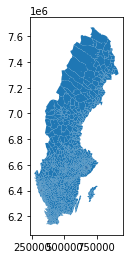

In [13]:
# And now since we have a geometry, we can plot maps really easy with .plot() function. That is it and Wallah you get a map
regions.plot()

In [14]:
# One important aspect in Geodata processing is to look the coordinate reference System (CRS) of the data
# This is again easy in Geopandas and can be accessed via .crs function
regions.crs

<Derived Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Exercise 2.1

We will learn more about Geographic data visualization and cartography in another section, but I think this is cool. Look at that map with one line of code! Now this is your time to shine, your first exercise. Here are your tasks



1.   Read cities.geojson with ** read_file() ** function we have used for the regions. Name it *cities*
2.   Display the first 5 rows  ** .head() **
3.   Describe the data ** .describe **
4.   Get the number of rows and columns  **.shape**
5.   Make a map of cities **.plot **
6.   Get the CRS of the cities data **.crs**



In [15]:
# 1. Read cities.geojson with read_file() function we have used for the regions. Name it cities
cities = gpd.read_file('DATA/cities.geojson')

In [16]:
# 2. Display the first 5 rows .head()
cities.head()

,osm_id,code,fclass,population,name,geometry
0,11094836,1002,town,29891,Nyköping,POINT (17.01181 58.75449)
1,15412058,1001,city,93838,Helsingborg,POINT (12.70407 56.04420)
2,20853389,1002,town,6497,Nykvarn,POINT (17.43124 59.17724)
3,20975576,1002,town,7418,Söderköping,POINT (16.32162 58.48238)
4,20975577,1002,town,2685,Valdemarsvik,POINT (16.60322 58.20259)


In [17]:
# 3.Describe the data .describe
cities.describe()

,code,population
count,314.000000,314.000000
mean,1001.945860,21357.550955
std,0.299518,60315.219283
min,1001.000000,0.000000
25%,1002.000000,3887.500000
50%,1002.000000,8258.500000
75%,1002.000000,18592.500000
max,1005.000000,829417.000000


In [18]:
# 4. Get the number of rows and columns- use .shape
cities.shape

(314, 6)

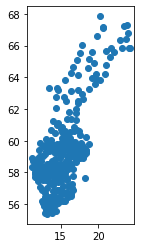

In [19]:
#Make a map of cities- use .plot
cities.plot()

In [20]:
# 6. Get the CRS of the cities data .crs
cities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### 2.2 Geographic Coordinate Reference Systems (CRS)

As you can see our cities data and regions have different Coordinate refereces. So in the next subsection, we will cover Coordinate Refercen Systems and Projections of Geographic data. Coordinate reference systems tells how our data as two dimensional(planar) relates to actual places on earth. It is the glue that holds the attributes to thier respective locations. Geodataframes has .crs attribute that can give you the original crs used in the data. It is easy to transform and project these coordinates and some times it is neccessary in order to carry out geographic analysis and get the right values out the analysis. So let us convert the cities data into the same crs of the regions, 'epsg:3006' Sweden Reference system. Before, we do that, I will show you what happens if we overlay both cities and regions without reprojecting it. You do not need to understand the visualization code right now ( We will cover Geovisualization section later).

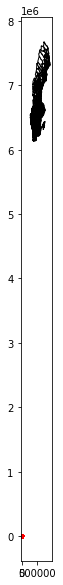

In [22]:
fig, ax  = plt.subplots(figsize=(14,10))
ax.set_aspect('equal')

regions.plot(ax=ax, color='white', edgecolor='black')
cities.plot(ax=ax, marker = '*', color='red', markersize=5)
plt.show()

You can see data is not alligned and therefore we need to project the cities into the same regions crs. To do that in Geopandas, we can use ** .to_crs()** function and provide the name of the crs we want. In this case we will use 'epsg:3006'.

In [23]:
# You see 
cities_proj = cities.to_crs({'init': 'epsg:3006'}) 

/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


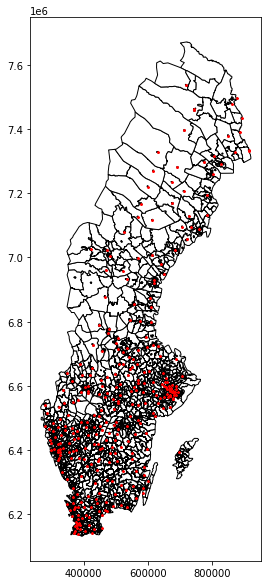

In [24]:
fig, ax  = plt.subplots(figsize=(14,10))
ax.set_aspect('equal')
regions.plot(ax=ax, color='white', edgecolor='black')
cities_proj.plot(ax=ax, marker = '*', color='red', markersize=5)
plt.show()

Now that we have projected the cities into 'epsg:3006', both data allign perfectly well. From now, keep in mind that we will use the ** cities_proj ** from now on.

### 2.3 Spatial Join

The city data does not have a region, and our smaller areas regions data does not have region names but rather small area codes(probably voting areas, the data is from SCB). Now, let us say we need to get only cities with a certain region(Vastra Götland). If we had a unique attribute shared by these two data, we could use attribute joins, but we don't have that, and therefore we need to load the Vastra Götland regions and do Spatial join.

By this time, you know how to load geographic data with **.read_file()** So what we will do is, open vastra.shp shapefile and do the same data exploration we have done for both cities and regions. Let us name this **vastra**

In [25]:
vastra = gpd.read_file('DATA/vastra.shp', encoding='UTF-8') # fIX THE ENCODINGS

In [26]:
vastra.head()

,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1,geometry
0,414,Kommun,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0,"POLYGON ((408887.450 6512813.931, 399589.973 6..."
1,414,Kommun,1427,Soten�s,14,V�stra G�talands l�n,1427,14,271235.0,6477930.0,0.0,0,0.0,"POLYGON ((294008.074 6486504.549, 293582.164 6..."
2,414,Kommun,1472,Tibro,14,V�stra G�talands l�n,1472,14,454587.0,6479200.0,0.0,0,0.0,"POLYGON ((461499.992 6491253.550, 461464.634 6..."
3,414,Kommun,1492,�m�l,14,V�stra G�talands l�n,1492,14,364344.0,6536910.0,0.0,0,0.0,"POLYGON ((378643.097 6521285.034, 378454.516 6..."
4,414,Kommun,1486,Str�mstad,14,V�stra G�talands l�n,1486,14,275764.0,6537670.0,0.0,0,0.0,"POLYGON ((295874.894 6533034.839, 295577.173 6..."


In [27]:
vastra.shape

(51, 14)

In [28]:
vastra.crs

<Derived Projected CRS: EPSG:3006>
Name: SWEREF99 TM
Axis Info [cartesian]:
- N[north]: Northing (metre)
- E[east]: Easting (metre)
Area of Use:
- name: Sweden - onshore and offshore.
- bounds: (10.03, 54.96, 24.17, 69.07)
Coordinate Operation:
- name: SWEREF99 TM
- method: Transverse Mercator
Datum: SWEREF99
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

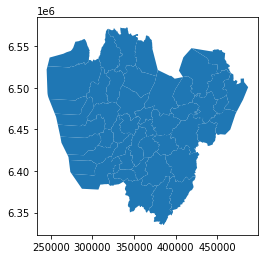

In [29]:
vastra.plot()

We have got Vastra region loaded and now we can get all cities with in this region in Geopandas by using **gpd.sjoin()** function and provide two datasets: in our case cities and the region. We need also to provide how we want to joine (inner, left, right), and the geoprocessing operation(i,e, within, intersection, contain, etc). Since we want to get all cities with in the region, we do it this way: Give me cities  that fall within with in vastra region.

In [30]:
vastra_cities = gpd.sjoin(cities_proj, vastra, how="inner", op='within')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3249: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):
<ipython-input-30-afd7e04bf4ee>:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:3006 +type=crs
Right CRS: EPSG:3006

  vastra_cities = gpd.sjoin(cities_proj, vastra, how="inner", op='within')


In [31]:
vastra_cities.head()

,osm_id,code,fclass,population,name,geometry,index_right,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1
6,21382663,1002,town,4928,Lilla Edet,POINT (330937.487 6447347.505),39,414,Kommun,1462,Lilla Edet,14,V�stra G�talands l�n,1462,14,331659.0,6447140.0,0.0,0,0.0
11,24970666,1002,town,8027,Tidaholm,POINT (438819.655 6449263.415),41,414,Kommun,1498,Tidaholm,14,V�stra G�talands l�n,1498,14,437889.0,6445560.0,0.0,0,0.0
13,25508588,1002,town,34466,Skövde,POINT (432438.212 6472694.463),24,414,Kommun,1496,Sk�vde,14,V�stra G�talands l�n,1496,14,436099.0,6476920.0,0.0,0,0.0
17,25710724,1002,town,3889,Vara,POINT (379927.452 6459575.461),13,414,Kommun,1470,Vara,14,V�stra G�talands l�n,1470,14,386131.0,6457600.0,0.0,0,0.0
24,25930131,1001,city,522259,Göteborg,POINT (319298.131 6400160.721),32,414,Kommun,1480,G�teborg,14,V�stra G�talands l�n,1480,14,307047.0,6395380.0,0.0,0,0.0


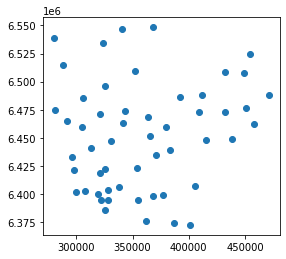

In [32]:
# All cities in this region
vastra_cities.plot()

 If you think about it, you can also use ** contain ** operation here by providing the a query like give a the vastra region that contains any city within cities table. Well let us see if we can find out if Gothenburg is part of this region. We first need to get column, in this case it is called name and we can use logical operations like equality '=='. If the name is found in the table, it will return its row, if not, nothing will returned
 

In [33]:
gothenburg = vastra_cities[vastra_cities['name'] == 'Göteborg']
gothenburg

,osm_id,code,fclass,population,name,geometry,index_right,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1
24,25930131,1001,city,522259,Göteborg,POINT (319298.131 6400160.721),32,414,Kommun,1480,G�teborg,14,V�stra G�talands l�n,1480,14,307047.0,6395380.0,0.0,0,0.0


#### Exercise 2.2
Find out if Borås is a city in vastra_cities. 

In [ ]:
# Write your code here

There are a lot of geoprocessing operations available in Geopandas, and before we move into Raster data with Rasterio library, we will learn how to do buffering. Let us say we need to get 100 or 500 meters buffer around Gothenburg city. As you might have guessed it right, you can say .buffer() and you would get a buffer around your point. That is right let us see. 

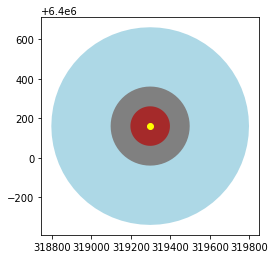

In [34]:
# Let us create a buffer of 500, 200, 100 meters and plot them
goth_100 = gothenburg.buffer(100)
goth_200 = gothenburg.buffer(200)
goth_500 = gothenburg.buffer(500)
fig, ax = plt.subplots()
#vastra.plot(ax=ax)
goth_500.plot(ax=ax, color='lightblue')
goth_200.plot(ax=ax, color='gray')
goth_100.plot(ax=ax, color='brown')
gothenburg.plot(ax=ax, color='Yellow')


#### Exercise 2.3 
Create buffer around Borås, provide the size you like

In [ ]:
# Exercise: Buffer Borås 500 meters and plot it 

## Section 3 - Raster Geodata 

In [35]:
# Import libraries
import rasterio as rio
from rasterio.plot import show, show_hist
from rasterio.mask import mask
from rasterio import crs
from rasterio.warp import calculate_default_transform, reproject, Resampling
import matplotlib.pyplot as plt
import fiona


### 3.1 Rasterio

Opening a raster file is almost the same but since we are using a new library, Rasterio, there are a little differences. We will learn how to read and write raster data as well as how to access European Union Copernicus Sentinel 2 data directly in your notebook. In the above cell we have imported rasterio as rio. So we will use this abbreviation in this section. 

Let us read the DEM file we have downloaded at the begining of this tutorial. 

In [36]:
dem = rio.open(r'DATA/GBGDEM_50m.tif') # Opening a raster file with Rasterio
type(dem)

rasterio.io.DatasetReader

In [37]:
# What is the crs of the data?
dem.crs

CRS.from_wkt('PROJCS["SWEREF99 TM",GEOGCS["SWEREF99",DATUM["SWEREF99",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6619"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [38]:
# Show me the width of the raster
dem.width

740

In [39]:
# Count the number of bands, DEM has only 1, we will see later multiband raster images
dem.count

1

In [40]:
# Wait a minute, can i get all of those parameters at one go. YES!
dem.meta

{'driver': 'GTiff',
 'dtype': 'int32',
 'nodata': -2147483647.0,
 'width': 740,
 'height': 696,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["SWEREF99 TM",GEOGCS["SWEREF99",DATUM["SWEREF99",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6619"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",15],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(50.0, 0.0, 301475.0,
        0.0, -50.0, 6415775.0)}

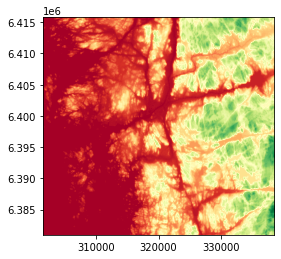

In [41]:
# How do i visualize raster data with raster?
# Since we have import from rasterio.plot import show, we can use show(raster)
show(dem, cmap='RdYlGn')

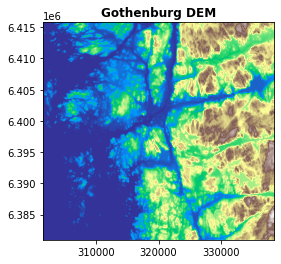

In [42]:
show(dem, cmap='terrain', title='Gothenburg DEM')

plt.show()

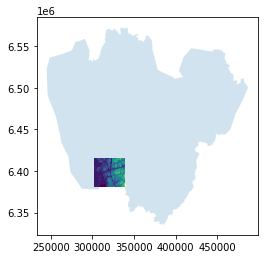

In [43]:
# Let us overlay the regions and the DEM 
fig, ax = plt.subplots() # Create a matplotlib fig and axis that the two data can share

show(dem, ax= ax)
vastra.plot(ax=ax, alpha=0.2)

Alright, can we clip our DEM to gothenburg Boundary. Yes let us try that. First we need to get gothenburg polygons from the vastra region.

In [44]:
vastra.head()

,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1,geometry
0,414,Kommun,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0,"POLYGON ((408887.450 6512813.931, 399589.973 6..."
1,414,Kommun,1427,Soten�s,14,V�stra G�talands l�n,1427,14,271235.0,6477930.0,0.0,0,0.0,"POLYGON ((294008.074 6486504.549, 293582.164 6..."
2,414,Kommun,1472,Tibro,14,V�stra G�talands l�n,1472,14,454587.0,6479200.0,0.0,0,0.0,"POLYGON ((461499.992 6491253.550, 461464.634 6..."
3,414,Kommun,1492,�m�l,14,V�stra G�talands l�n,1492,14,364344.0,6536910.0,0.0,0,0.0,"POLYGON ((378643.097 6521285.034, 378454.516 6..."
4,414,Kommun,1486,Str�mstad,14,V�stra G�talands l�n,1486,14,275764.0,6537670.0,0.0,0,0.0,"POLYGON ((295874.894 6533034.839, 295577.173 6..."


In [45]:
# Get Gothenburg Polygon
gotheborg_polygon = vastra[vastra.KOMMUNNAMN == 'G�teborg']
gotheborg_polygon

,KKOD,KATEGORI,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1,geometry
32,414,Kommun,1480,G�teborg,14,V�stra G�talands l�n,1480,14,307047.0,6395380.0,0.0,0,0.0,"POLYGON ((322858.598 6417170.611, 322404.301 6..."


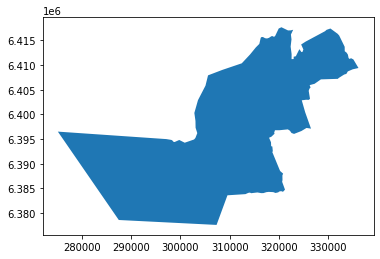

In [46]:
# Plot it
gotheborg_polygon.plot()

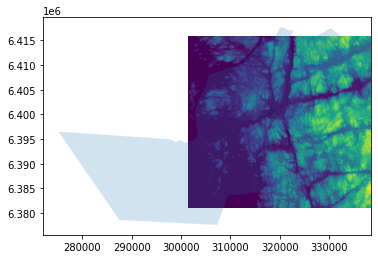

In [47]:
# Overlay gothenburg polygon with 
fig, ax = plt.subplots()

show(dem, ax= ax)
gotheborg_polygon.plot(ax=ax, alpha=0.2) # Alpha for transparency

Before, we can clip the dem to gothenburg polygon, we first need to get each polygon geometry. We can achieve through looping. A handy way to use is what python calls a list comprehension. Instead of writing: 



```
for geom in gothenburg_polygon:
           DO WHATEVER
```
 We can save our variable and use list comprehension at the same place.


In [48]:
vector_geoms = [feature for feature in gotheborg_polygon.geometry]
vector_geoms

First open the DEM raster and get it as src with. Get the meta data from the source. With opening a new raster with W writing mode, we can provide the src metadata and  mask out regions of a raster that are outside the polygons defined in the shapefile. 

In [49]:
with rio.open(r'DATA/GBGDEM_50m.tif') as src:
    out_image, out_transform = rio.mask.mask(src, vector_geoms,
                                                        crop=True)
    out_meta = src.meta.copy()
    
out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})
with rio.open("masked_raster.tif", "w", **out_meta) as dest:
    dest.write(out_image)

We have saved our new DEM clipped to gothenburg polygon. Now let us show it. It is saved in the File Folder.

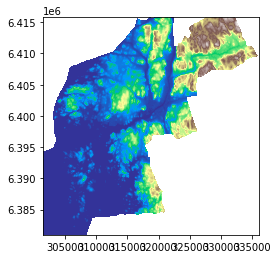

In [50]:
masked = rio.open('masked_raster.tif')
show(masked, cmap='terrain')

### 3.2 Acessing Sentinel Images

We will use sentinel hub python library in this sub section to access satellite images. Let us first import the library

In [51]:
from sentinelhub import WebFeatureService,WmsRequest, WcsRequest, MimeType, CRS, BBox , DataSource
INSTANCE_ID = '17c6af41-2b13-40d0-a3cb-70d27828a986'

ImportError: ignored

Before we see sattellite images available, we need to create a bounding box of the area we want to get for the satellite images. We have gothenburg polygon that we can use but remeber it is in epsg:3006 and we need to convert it to wgs84 epsg 4236. I hope you remember how to do this with to_crs()


In [ ]:
goth4326 = gotheborg_polygon.to_crs({'init': 'epsg:4326'}) 

In [ ]:
# The bounds for our search - list them
list(goth4326.total_bounds)

[11.23134662100365, 57.50009169857011, 12.24224079463422, 57.866419256228376]

Sentinel Hub python library is really great way to access data without even downloading it locally. Let us search for images taken this year 2018 in Gothenburg. 

In [ ]:

search_bbox = search_bbox = BBox(bbox=list(goth4326.total_bounds), crs=CRS.WGS84)
search_time_interval = ('2018-01-01T00:00:00', '2018-11-30T23:59:59')
wfs_iterator = WebFeatureService(search_bbox, search_time_interval,
                                 data_source=DataSource.SENTINEL2_L1C,
                                 maxcc=1.0, instance_id=INSTANCE_ID)



In [ ]:
# give me the first 5 tiles
wfs_iterator.get_tiles()[:5]

[('32VPJ', '2018-11-29', 0),
 ('33VUD', '2018-11-29', 0),
 ('32VPK', '2018-11-29', 0),
 ('33VUE', '2018-11-29', 0),
 ('32VPJ', '2018-11-26', 0)]

In [ ]:
# How many images do we have with in this period
wfs_iterator.index

538

In [ ]:
def plot_image(image, factor=1):
    """
    Utility function for plotting RGB images.
    """
    fig = plt.subplots(nrows=1, ncols=1, figsize=(15, 7))
    
    if np.issubdtype(image.dtype, np.floating):
        plt.imshow(np.minimum(image * factor, 1))
    else:
        plt.imshow(image)

In [ ]:
boundary_coords = list(goth4326.total_bounds)
boundary_coords

[11.23134662100365, 57.50009169857011, 12.24224079463422, 57.866419256228376]

In [ ]:
bounding_box = BBox(bbox=boundary_coords, crs=CRS.WGS84)
bounding_box

BBox(((11.23134662100365, 57.50009169857011), (12.24224079463422, 57.866419256228376)), crs=EPSG:4326)

Let us open one image from the search result. Here you provide the date of the image you want.

In [ ]:
wms_bands_request = WmsRequest(layer='BANDS-S2-L1C',
                               bbox=bounding_box, 
                               time=('2018-10-07'),#2018-10-25
                               width=512, height=856,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)


In [ ]:
image = wms_bands_request.get_data()

In [ ]:
wms_bands_img[0][:, :, 12].shape

(856, 512)

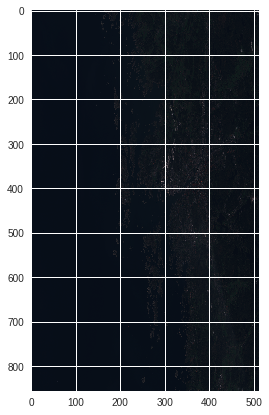

In [ ]:
plot_image(wms_bands_img[-1][:, :, [3, 2, 1]])# tRUE COLOR IMAGE

In [ ]:
## Saving it and downloading is easy
wms_bands_request = WmsRequest(data_folder='DATA',
                               layer='BANDS-S2-L1C',
                               bbox=bounding_box, 
                               time=('2018-10-07'),#2018-10-25
                               width=512, height=856,
                               image_format=MimeType.TIFF_d32f,
                               instance_id=INSTANCE_ID)
wms_bands_img = wms_bands_request.get_data(save_data=True)

In [ ]:
raster = rio.open('DATA/wms_BANDS-S2-L1C_EPSG4326_11.23134662100365_57.50009169857011_12.24224079463422_57.866419256228376_2018-10-07T10-31-44_512X856_tiff_depth=32f.tiff')

In [ ]:
# We have 13 bands in Sentinel 2 images. 
raster.meta

{'count': 13,
 'crs': CRS({'init': 'epsg:4326'}),
 'driver': 'GTiff',
 'dtype': 'float32',
 'height': 856,
 'nodata': None,
 'transform': Affine(0.001974402682872207, 0.0, 11.23134662100365,
       0.0, -0.0004279527542736756, 57.866419256228376),
 'width': 512}

A simple and useful measure in Remote sensing is the normalized difference vegetation index (NDVI). It is good way to assess and show vegtation from space. Let us do that with Rasterio. We need band 8 which Near infrared and Band 4 which is the red band

In [ ]:
red = raster.read(4)
nir = raster.read(8)

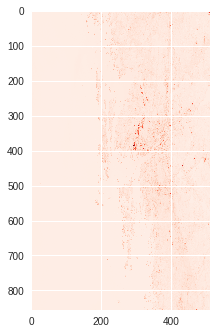

In [ ]:
show(red, cmap='Reds')

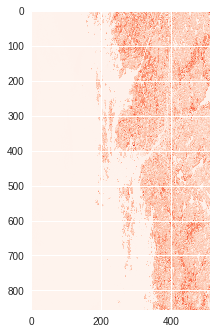

In [ ]:
show(nir, cmap='Reds')

To calculate the NDVI, we need to substrat NIR from Red and divide by NIR + RED

In [ ]:
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

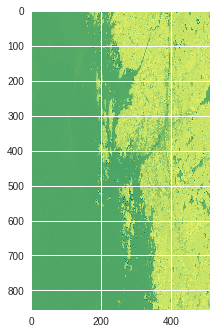

In [ ]:
show(ndvi, cmap=plt.cm.summer)


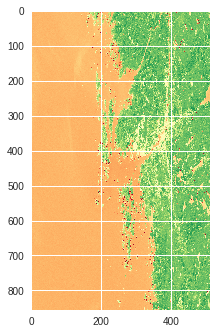

In [ ]:
show(ndvi, cmap='RdYlGn')

## Section 4 - Geodata Visualization

There are alot of python libraries that can visualize geographi data, including as we have seen Geopandas. If you need more functionality, there are tons of libraries (Mapbox & CartoDB have created they python libraries which you can use). I like Folium the most, and that is what we will use for the interactive visualization. 

### 4.1 Static Maps

We will create static map of smaller areas with in the vastra region. Before we can do that we need to disolve the vastra boundary and get all smaller regional areas with in this boundary, like we did in spatial join section

In [ ]:
Vastra_BB = vastra.dissolve(by='KATEGORI')

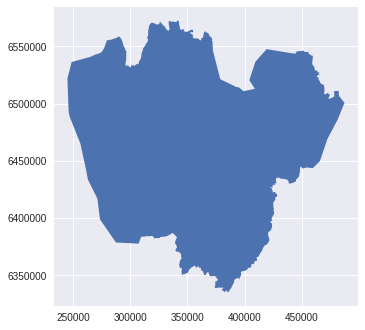

In [ ]:
Vastra_BB.plot()

In [ ]:
# Let us get small areas regions inside Vastra Region
vastra_areas = gpd.sjoin(regions, Vastra_BB, how="inner", op='within')

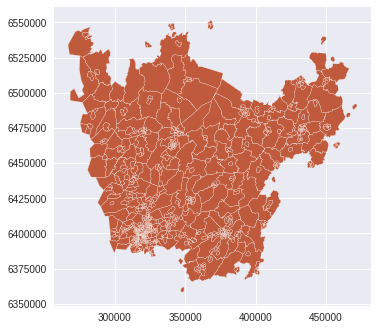

In [ ]:
vastra_areas.plot(facecolor='#D8A493', edgecolor='white', linewidth=0.2 , color='#C05A3C')
plt.show()

Let us overylay the cities and the smaller regions in vastra region

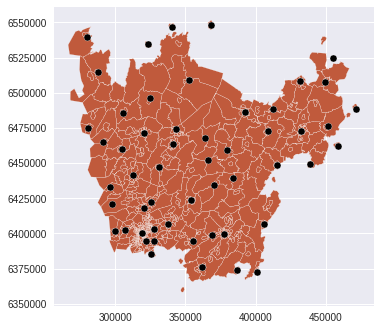

In [ ]:
fig, ax = plt.subplots()
vastra_areas.plot(ax=ax, facecolor='#D8A493', edgecolor='white', linewidth=0.2 , color='#C05A3C')
vastra_cities.plot(ax=ax, color='black', edgecolor='white')


Can we do choropleth map of population in vastra small areas. Yes you can use geopandas for this as well as folium. But let us do that now in Geopandas. You need to provide the column and scheme for the classificaiton

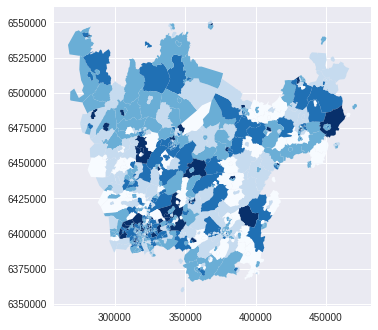

In [ ]:
vastra_areas.plot(column='Bef_201612', scheme='equal_interval', cmap='Blues')

### Exercise 4.1

You might have noticed that the choropleth map is not correct. We need first to normalize data by dividing the population and area size and then do the choropleth.

I will give you a hint, to calculate an area of say a table with geometry, you can use this expression

table['area'] = table.geometry.area

and there you will have an area size for each polygon.

Now you need to create another column. Let us call pop_density:
pop_density = x / y x being the population y being the area size

You will end up with population density column in your data and that is the correct column to use for choropleth map. Now produce similar choropleth map with the new column you have created

### 4.2 Interactive Maps with Folium

In this last sub section, I will show you to make interactive maps with Folium. You have nice basemaps here to use which can make your maps more beautiful. Let us map all cities in vastra region.

In [ ]:
m = folium.Map(
    location=[57.69882, 11.973229],
    tiles='CartoDB dark_matter',
    zoom_start=8
)

folium.GeoJson(vastra_cities).add_to(m)
m

In [ ]:
vastra_areas.head()

,Deso,Bef_201612,geometry,index_right,KKOD,KOMMUNKOD,KOMMUNNAMN,LANSKOD,LANSNAMN,KOM_KOD,LAN_KOD,X_poly,Y_poly,X_lan_poly,Y_lan_poly,Y_lan_po_1
3208,1430A0020,1397,(POLYGON ((302807.0818471645 6493313.674620725...,Kommun,414,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0
3209,1430A0030,1514,(POLYGON ((307688.6876070775 6500305.861419075...,Kommun,414,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0
3210,1430A0040,1553,"(POLYGON ((321549.193398352 6508056.364169326,...",Kommun,414,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0
3212,1435A0020,1619,"(POLYGON ((298307.299719154 6502935.775906275,...",Kommun,414,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0
3215,1461A0020,2118,"(POLYGON ((350873.279010982 6511446.383847825,...",Kommun,414,1494,Lidk�ping,14,V�stra G�talands l�n,1494,14,385174.0,6492650.0,0.0,0,0.0


You can zoom and pan, you can also save your map easily with m.save('NAME'). Here are a number of availabe basemap in Folium, try some of them and see which one do you like best.

1. “OpenStreetMap”
2. “Mapbox Bright” (Limited levels of zoom for free tiles)
3. “Mapbox Control Room” (Limited levels of zoom for free tiles)
4. “Stamen” (Terrain, Toner, and Watercolor)
5. “Cloudmade” (Must pass API key)
6. “Mapbox” (Must pass API key)
7. “CartoDB” (positron and dark_matter)




*  End: We have reached the end of this tutorial. I hope you have learnt something along this tutorial and feel comfortable using geographic data processing in Python. Keep Learning!